In [38]:
%matplotlib inline
import spotipy
import spotipy.util as util
import random
import time
from fuzzywuzzy import fuzz
import pandas as pd
import numpy as np
import seaborn as sns


In [39]:
#Crea el Spotify API token
CLIENT_ID = 'f89dce0b1fae420ab4fab1436153049a'
CLIENT_SECRET = '15957d4844604f938f74ac855e74cce1'

token = util.oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

cache_token = token.get_access_token()
print(cache_token)
sp = spotipy.Spotify(cache_token)

BQAVlKkpr3_Idw0Fj8TNMQcf_G69KWsmw4yT56e1LiYHwUQrBVMl6bS1Zbli4e_NiOdpPiYgl0-E9H4z6tXaeQ


In [40]:
billboard = pd.read_csv('../Data/billboard2.csv')
billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Compara dos strings (nombres de artistas del csv y la API) y devuelve si son el mismo o no
def fuzzyMatches(a,b):
    def preprocess(s):
        l = s.lower()
        w = l.split(' ')
        w.sort()
        return ' '.join(w)
    return fuzz.ratio(preprocess(a),preprocess(b)) > 70

#Devuelve el index del artista en los resultados de la API para la canción
def getArtistIndex(tracks,artist):
    index = None
    for i in range(len(tracks)):
        if fuzzyMatches(tracks[i]['artists'][0]['name'],artist):
            index = i

    return index
    
#Llama a la API y devuelve la info para la canción
def getFeatures(track,artist):
    print('track: %s  artist: %s'% (track,artist))
    searchResult = sp.search(q = track, limit=50, offset=0, type='track', market=None)
    artistIndex = getArtistIndex(searchResult['tracks']['items'],artist)
    if artistIndex == None:
        print('Not Found: ', artist)
        return None
     
    
    trackId = str(searchResult['tracks']['items'][artistIndex]['id'])
    featuresResult = sp.audio_features(tracks=[trackId])
    
    return pd.Series(featuresResult[0])
    
#Agrega filas con info para cada una de las canciones
def process(s):
    time.sleep(1)
    features = getFeatures(s['track'],s['artist.inverted'])
    return s.append(features)
  

z = billboard[['track','artist.inverted']].apply(process, axis = 1)


track: Independent Women Part I  artist: Destiny's Child
Not Found:  Destiny's Child
track: Independent Women Part I  artist: Destiny's Child
Not Found:  Destiny's Child
track: Maria, Maria  artist: Santana
track: I Knew I Loved You  artist: Savage Garden
track: Music  artist: Madonna
Not Found:  Madonna
track: Come On Over Baby (All I Want Is You)  artist: Aguilera, Christina
track: Doesn't Really Matter  artist: Janet
track: Say My Name  artist: Destiny's Child
track: Be With You  artist: Iglesias, Enrique
track: Incomplete  artist: Sisqo
track: Amazed  artist: Lonestar
track: It's Gonna Be Me  artist: N'Sync
track: What A Girl Wants  artist: Aguilera, Christina
track: Everything You Want  artist: Vertical Horizon
track: With Arms Wide Open  artist: Creed
track: Try Again  artist: Aaliyah
Not Found:  Aaliyah
track: Bent  artist: matchbox twenty
track: Thank God I Found You  artist: Carey, Mariah
track: Breathe  artist: Hill, Faith
track: Case Of The Ex (Whatcha Gonna Do)  artist: Mya

track: Stan  artist: Eminem
track: I'll Be  artist: McEntire, Reba
Not Found:  McEntire, Reba
track: Feelin' Good  artist: Lopez, Jennifer
track: Your Everything  artist: Urban, Keith
track: Dear Lie  artist: TLC
track: Feels Like Love  artist: Gill, Vince
track: Could I Have This Kiss Forever  artist: Houston, Whitney
track: The Bad Touch  artist: Bloodhound Gang
track: Angels  artist: Williams, Robbie
track: Because You Love Me  artist: Messina, Jo Dee
track: Country Comes To Town  artist: Keith, Toby
track: Girls Dem Sugar  artist: Beenie Man
track: Let's Make Love  artist: Hill, Faith
Not Found:  Hill, Faith
track: Caught Out There  artist: Kelis
track: Anything  artist: Jay-Z
Not Found:  Jay-Z
track: Loser  artist: 3 Doors Down
track: You'll Always Be Loved By Me  artist: Brooks & Dunn
track: What I Need To Do  artist: Chesney, Kenny
track: No More Rain (In This Cloud)  artist: Stone, Angie
track: That's What I'm Looking For  artist: Da Brat
track: This Woman Needs  artist: SheDai

In [41]:
z = pd.read_csv('../Notebook/audioFeatures.csv', encoding='latin1')
z.head()

,acousticness,analysis_url,artist.inverted,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track,track_href,type,uri,valence
0,NaN,NaN,Destiny's Child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent Women Part I,NaN,NaN,NaN,NaN
1,0.0449,https://api.spotify.com/v1/audio-analysis/1K1e...,Santana,0.732,260600.0,0.785,1K1eWNYfVLhbPJXmJG45Zu,0.000000,7.0,0.0792,-5.391,1.0,0.0837,97.926,4.0,"Maria, Maria",https://api.spotify.com/v1/tracks/1K1eWNYfVLhb...,audio_features,spotify:track:1K1eWNYfVLhbPJXmJG45Zu,0.641
2,0.8190,https://api.spotify.com/v1/audio-analysis/1OdU...,Savage Garden,0.425,206107.0,0.259,1OdUJBSxF0sExz1BmSax6k,0.000000,9.0,0.1470,-10.563,1.0,0.0310,172.018,3.0,I Knew I Loved You,https://api.spotify.com/v1/tracks/1OdUJBSxF0sE...,audio_features,spotify:track:1OdUJBSxF0sExz1BmSax6k,0.454
3,NaN,NaN,Madonna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Music,NaN,NaN,NaN,NaN
4,0.1600,https://api.spotify.com/v1/audio-analysis/5PHI...,"Aguilera, Christina",0.835,221107.0,0.897,5PHIN7k1w1JQO1INl2qNpW,0.000062,8.0,0.3560,-3.369,1.0,0.0978,118.893,4.0,Come On Over Baby (All I Want Is You),https://api.spotify.com/v1/tracks/5PHIN7k1w1JQ...,audio_features,spotify:track:5PHIN7k1w1JQO1INl2qNpW,0.767


In [42]:
billboard[['track','artist.inverted']].head(1)

,track,artist.inverted
0,Independent Women Part I,Destiny's Child


In [43]:
z.to_csv('./spotify.csv', encoding='latin1', index = False)

In [44]:
z.isnull().sum()

acousticness        47
analysis_url        47
artist.inverted      0
danceability        48
duration_ms         47
energy              47
id                  47
instrumentalness    47
key                 47
liveness            47
loudness            47
mode                47
speechiness         48
tempo               47
time_signature      48
track                0
track_href          47
type                47
uri                 47
valence             48
dtype: int64

In [45]:
#Join del dataset original con la info de la API
x = pd.merge(billboard, z)
x.sample(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
175,2000,Pearl Jam,Nothing As It Seems,5:20,Rock,2000-05-13,2000-05-13,49,70.0,84.0,...,0.8980,-5.919,1.0,0.0325,136.602,4.0,https://api.spotify.com/v1/tracks/1tQUi41PASEz...,audio_features,spotify:track:1tQUi41PASEzcA5pFzQO9C,0.104
303,2000,Lil' Mo,Ta Da,4:17,Rap,2000-08-12,2000-09-16,100,99.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2000,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,Rock,2000-01-29,2000-02-26,76,59.0,52.0,...,0.3700,-6.707,1.0,0.0299,74.970,4.0,https://api.spotify.com/v1/tracks/0FzZkbdKATBM...,audio_features,spotify:track:0FzZkbdKATBMU4fKHXah3R,0.643
98,2000,"Moore, Mandy",I Wanna Be With You,4:12,Pop,2000-06-17,2000-08-12,69,63.0,54.0,...,0.0752,-1.464,0.0,0.1070,107.976,4.0,https://api.spotify.com/v1/tracks/0bgAhDv19PPy...,audio_features,spotify:track:0bgAhDv19PPyMsdQjtlmxl,0.697
92,2000,Dr. Dre,The Next Episode,2:38,Rap,2000-05-27,2000-07-29,78,67.0,58.0,...,0.0885,-3.631,0.0,0.0446,95.417,4.0,https://api.spotify.com/v1/tracks/4BmWbWeiHVAv...,audio_features,spotify:track:4BmWbWeiHVAv6lMabQTn3Y,0.855
29,2000,"Jordan, Montell",Get It On.. Tonite,4:34,Rap,1999-10-23,2000-02-12,92,80.0,72.0,...,0.1050,-19.225,1.0,NaN,0.000,NaN,https://api.spotify.com/v1/tracks/3bV3msLNrXNE...,audio_features,spotify:track:3bV3msLNrXNExxuCn5CG80,NaN
257,2000,"Worley, Darryl",When You Need My Love,3:35,Country,2000-06-17,2000-09-02,98,88.0,93.0,...,0.3080,-5.028,1.0,0.0228,85.966,4.0,https://api.spotify.com/v1/tracks/2MCzWzsfRDDm...,audio_features,spotify:track:2MCzWzsfRDDmcQK79eWTtU,0.485
140,2000,"Wills, Mark",Back At One,4:00,Country,2000-01-15,2000-02-26,89,55.0,51.0,...,0.2610,-9.054,1.0,0.0319,130.087,4.0,https://api.spotify.com/v1/tracks/7Ka8w5nAkPYS...,audio_features,spotify:track:7Ka8w5nAkPYSvIYNGiHGm5,0.186
52,2000,"Backstreet Boys, The",Shape Of My Heart,3:49,Rock,2000-10-14,2000-12-02,39,25.0,24.0,...,0.1590,-5.915,1.0,0.0296,96.087,4.0,https://api.spotify.com/v1/tracks/235CN2O18gDm...,audio_features,spotify:track:235CN2O18gDmTm8fRdbhyB,0.541
39,2000,"Backstreet Boys, The",Show Me The Meaning Of Being Lonely,3:54,Rock,2000-01-01,2000-03-18,74,62.0,55.0,...,0.0809,-5.892,0.0,0.0256,167.970,4.0,https://api.spotify.com/v1/tracks/0wdvwFpMuDkm...,audio_features,spotify:track:0wdvwFpMuDkmozKTjycAyr,0.674


In [46]:
#Dos formas provisorias y muy simples de definir un hit. 
#Por el valor más alto que llegaron y por el promedio de todos sus puestos
x['min'] = x.loc[:,'x1st.week':'x76th.week'].min(axis=1)
x['mean'] = x.loc[:,'x1st.week':'x76th.week'].mean(axis=1)
w = x[['min','mean','energy','tempo','danceability','instrumentalness','loudness','speechiness','key','valence']].dropna()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


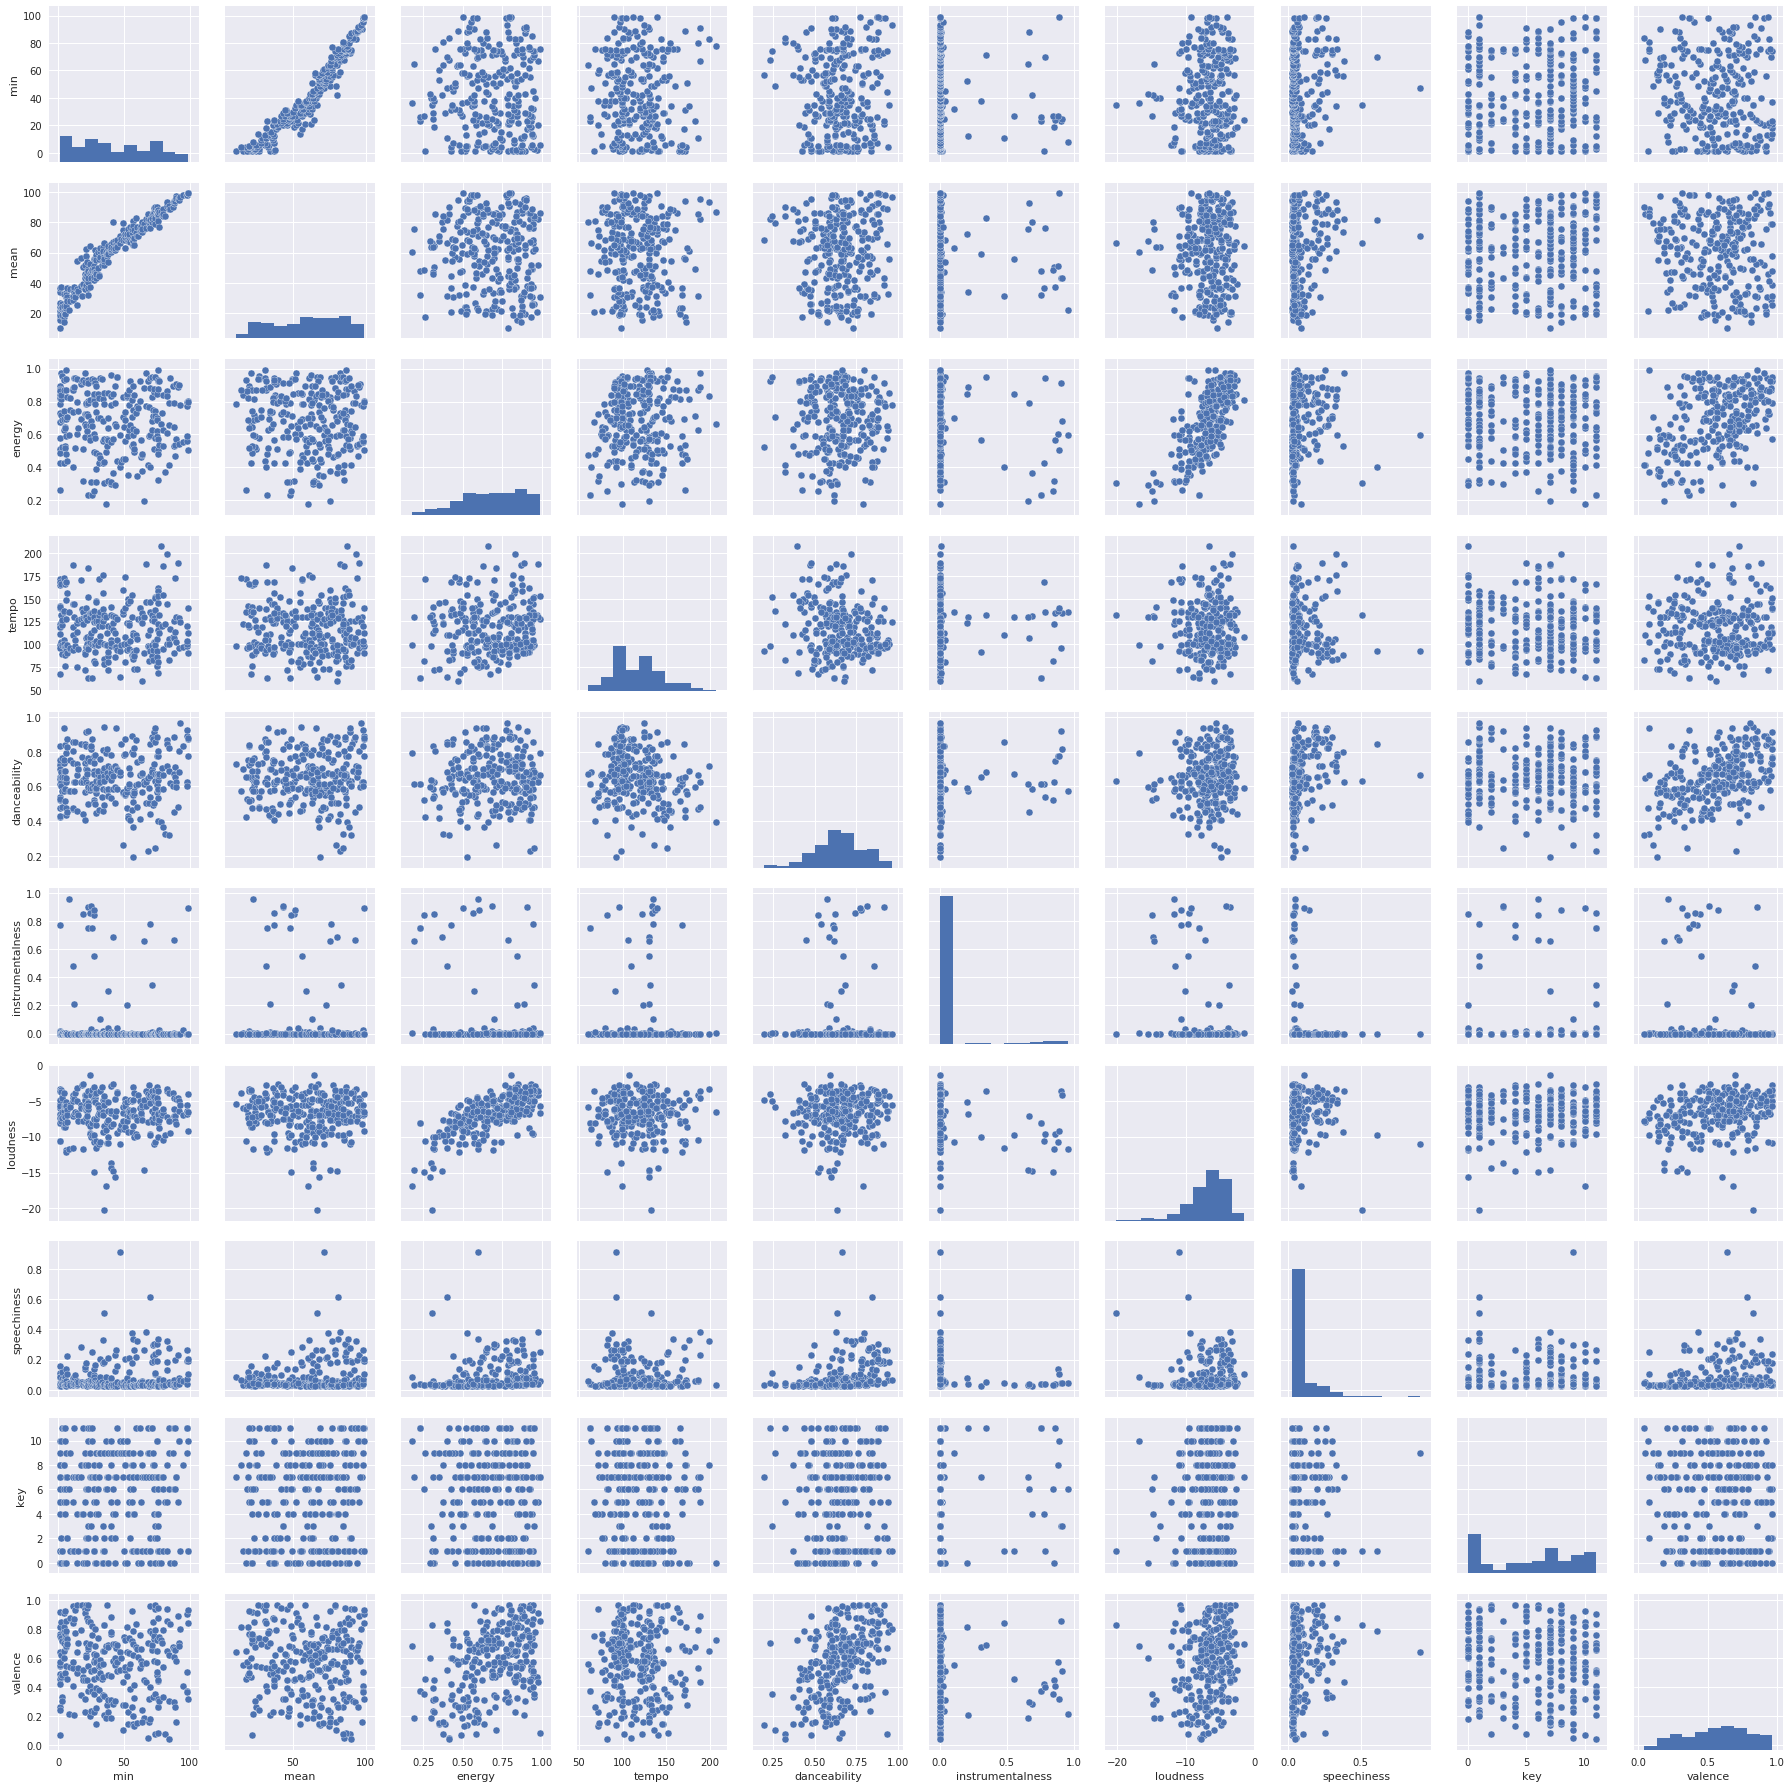

In [28]:
sns.pairplot(w)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


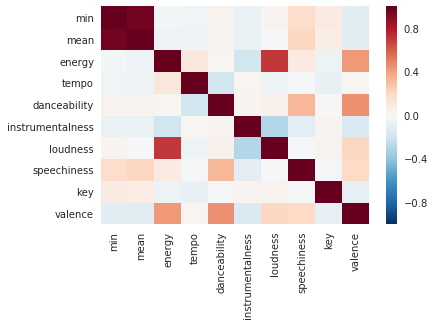

In [47]:
corr = w.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [48]:
w.corr(method='pearson', min_periods=1)

,min,mean,energy,tempo,danceability,instrumentalness,loudness,speechiness,key,valence
min,1.000000,0.966535,-0.030869,-0.035504,0.031635,-0.065193,0.031198,0.185816,0.080352,-0.110621
mean,0.966535,1.000000,-0.058392,-0.043060,0.034819,-0.065482,-0.009691,0.214793,0.072491,-0.113958
energy,-0.030869,-0.058392,1.000000,0.111008,0.022252,-0.194793,0.704652,0.088664,-0.049017,0.429891
tempo,-0.035504,-0.043060,0.111008,1.000000,-0.190555,0.019583,-0.050681,-0.012646,-0.073772,0.016965
danceability,0.031635,0.034819,0.022252,-0.190555,1.000000,0.028604,0.053185,0.331934,0.002559,0.460109
instrumentalness,-0.065193,-0.065482,-0.194793,0.019583,0.028604,1.000000,-0.294158,-0.102102,0.028512,-0.146176
loudness,0.031198,-0.009691,0.704652,-0.050681,0.053185,-0.294158,1.000000,-0.010477,0.037513,0.211288
speechiness,0.185816,0.214793,0.088664,-0.012646,0.331934,-0.102102,-0.010477,1.000000,-0.016352,0.197327
key,0.080352,0.072491,-0.049017,-0.073772,0.002559,0.028512,0.037513,-0.016352,1.000000,-0.087822
valence,-0.110621,-0.113958,0.429891,0.016965,0.460109,-0.146176,0.211288,0.197327,-0.087822,1.000000


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


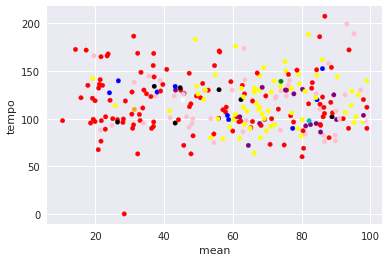

In [49]:
#Correlación entre la media del ranking y el tempo del tema por Genero (cada genero es un color)
colorDicc = {'Rock' : 'red', 'Latin':'blue', 'Country':'yellow', 'Rap':'pink', 'Pop':'black', 
             'Electronica':'white', 'Jazz' : 'orange',
             'R&B' : 'purple', 'Reggae' : 'green', 'Gospel': 'c'}
x[['genre','mean','tempo']].plot(kind='scatter', x = 'mean', y ='tempo' ,c = x['genre'].apply(lambda gen: colorDicc[gen]))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


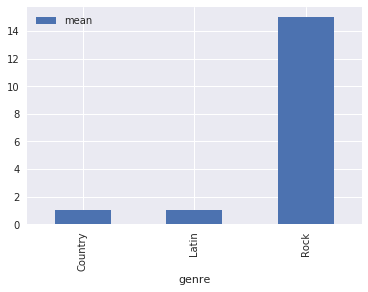

In [50]:
#Puestos N°1 por genero
x[['genre','mean']][x['min']<2].groupby('genre').count().plot(kind='bar')

In [51]:
#Definimos hit provisoriamente como un tema que estuvo en puesto 1 ó 2
#Dummies para los generos
x['hit'] = x['min'] < 3
dummies = pd.get_dummies(x['genre'])
xDummies = x.join(dummies)
xDummies.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,0,0,0,0,0,0,0,0,0,1
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,0,0,0,0,0,0,0,0,0,1
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,0,0,0,0,0,0,0,0,0,1
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,0,0,0,0,0,0,0,0,0,1
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
#Decision tree (no corre bien acá por un tema de paquetes..)
from sklearn import tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
import pydotplus

k = xDummies[['hit','Country','Electronica','Gospel','Jazz','Latin','Pop','R&B','Rap','Reggae','Rock','speechiness','tempo','danceability','loudness']].dropna().copy()
y = k["hit"]
X = k[['Country','Electronica','Gospel','Jazz','Latin','Pop','R&B','Rap','Reggae','Rock','speechiness','tempo','danceability','loudness']]
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X,y)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=['Country','Electronica','Gospel','Jazz','Latin','Pop','R&B','Rap','Reggae','Rock','speechiness','tempo','danceability','loudness'])  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

InvocationException: Program terminated with status: 1. stderr follows: Warning: Could not load "/home/ubuntu/anaconda3/lib/graphviz/libgvplugin_pango.so.6" - file not found
Warning: Could not load "/home/ubuntu/anaconda3/lib/graphviz/libgvplugin_pango.so.6" - file not found
Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot eps fig gv imap imap_np ismap pdf pic plain plain-ext png pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4
